In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
# For plotting confusion matrix
import seaborn as sns
# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

## Repeat data from previous lab

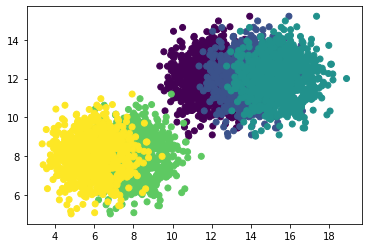

In [8]:
# 5 clouds, 914 poits per cloud.
N = 914
noise = np.random.randn(N, 2)
cloud1 = noise + np.array([2+10, 2+10])
cloud2 = noise + np.array([4+10, 2+10])
cloud3 = noise + np.array([5.41+10, 2+10])
cloud4 = noise + np.array([-2+10, -2+10])
cloud5 = noise + np.array([-4+10, -2+10])

data = np.vstack([cloud1, cloud2, cloud3 ,cloud4, cloud5])

# creates python lits...
annotation1 = [0]*914 
annotation2 = [1]*914 
annotation3 = [2]*914 
annotation4 = [3]*914 
annotation5 = [4]*914 
annotations = annotation1 + annotation2 + annotation3 + annotation4 + annotation5 # concatenates aforementionedli
plt.scatter(data[:,0], data[:,1], c=annotations)

## Continue third lab

## Metrics

A __false positive error__, or in short a __false positive (FP)__, commonly called a "false alarm", is a result 
that indicates a given condition exists, when it does not.
*A false positive error is a type I error.*

A __false negative error__, or in short a __false negative(FN)__, is a test result that indicates that a condition does
not hold, while in fact it does.
*A false negative error is a type II error.*

__True positive (TP)__ - correctly identified.

__False positive (FN)__ - incorrectly identified.

*Example:*

Imagine a study evaluating a new test that screens people for a disease. Each person taking the test either has or does not have the disease. The test outcome can be positive (classifying the person as having the disease) or negative (classifying the person as not having the disease). The test results for each subject may or may not match the subject's actual status. In that setting:

    True positive: Sick people correctly identified as sick
    False positive: Healthy people incorrectly identified as sick
    True negative: Healthy people correctly identified as healthy
    False negative: Sick people incorrectly identified as healthy

#### Accuracy
$$\large accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

### Precision, recall and f1-score

$$\large precision = \frac{TP}{TP + FP}$$
$$\large recall = \frac{TP}{TP + FN}$$
$$\large \ F = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

## Cross-Validation

<p>We always assess our models (NaiveBayse, neural network, etc) using validation set after training ones (the models). Generally it turnes out that the model does not fit the validation data as well as the training data. The size of that difference is likely to be large when the model is large (has too many parameters) or training set is too small. To measure this difference cross-validation is used.</p>
<p>In other words, cross-validation is a way to check how well the model generalizes to new data.</p>
<p>You did cross-validation in previous labs by splitting your data into training and validation set. This is called Holdout cross-validation and it's the most common one. There are other types of cross-validation that allow you to asses your model more accurately.</p>
<p>The Holdout cross-validation is a good choice if your data is uniform in terms of distribution and 'difficulty'. But if it's not the case, you can encounter a situtation when accross different training cycles your model performs differently. In this case in order to correctly assess your model other types of cross-validation must be used.</p>

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

## Hyperparameters Tuning

<p>Hyperparameters are the parameters that are not learned during training process but chosen by an engineer. An example of hyperparamer can be depth of a decision tree, number of neurons in a neural network or kernel in an SVM. Optimal hyperparameters vary from model to model, dataset to dataset and finding ones that suits your case the best is not an easy task.</p>
<p>There are several ways to search for the optimal hyperparameters:</p>
<p>1) Grid search</p>
<p>2) Random search</p>

In [10]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

 # Prepare Data 

In [11]:
data, annotations = shuffle(data, annotations)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, annotations, test_size=0.25)

from sklearn.metrics import precision_score

# Grid search Sci-Kit DecisionTreeClassifier

In [12]:
# Grid search Sci-Kit learn



model = DecisionTreeClassifier()

max_depth = [3, 4, 5, 6, 7]
max_leaf_nodes = [2, 3, 4, 5]
criterion = ['gini', 'entropy']
parameters = {
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'criterion': criterion
}

g_search = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring='precision_micro', # search as that we get minimum of 1 type error
    cv=5
)


_ = g_search.fit(Xtrain, Ytrain)

model = DecisionTreeClassifier(criterion=g_search.best_params_["criterion"], 
    max_leaf_nodes=g_search.best_params_["max_leaf_nodes"], max_depth=g_search.best_params_["max_depth"])
model.fit(Xtrain, Ytrain)
pred = model.predict(Xtest)
print('Results:', g_search.best_params_ )
res1 = g_search.best_params_
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV
# Use this link to see other attributes of the GridSearchCV object.

Results: {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5}


In [13]:
report1 = classification_report(Ytest, pred)
print('report for Grid search Sci-Kit DecisionTreeClassifier')
print()
print(report1)

report for Grid search Sci-Kit DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       236
           1       0.58      0.53      0.56       218
           2       0.76      0.75      0.76       225
           3       0.84      0.84      0.84       239
           4       0.85      0.84      0.85       225

    accuracy                           0.77      1143
   macro avg       0.76      0.76      0.76      1143
weighted avg       0.76      0.77      0.77      1143



<AxesSubplot:>

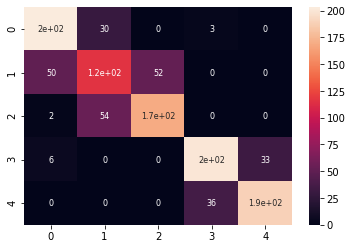

In [14]:
conf_mat = confusion_matrix(Ytest, pred)
sns.heatmap(conf_mat, annot=True,  annot_kws={"size": 8})

# Random search DecisionTreeClassifier

In [16]:
# Random search
# In random search instead of passing in all hyperparameters' values to try,
# you pass in the distribution of the parameters.

model = DecisionTreeClassifier()

distributions = dict(max_depth=list(range(1, 8)),
                     max_leaf_nodes=list(range(2, 25)),
                     criterion=['gini', 'entropy'])
                     
r_search = RandomizedSearchCV(
    model, 
    distributions, 
    random_state=0, 
    cv=5, # cross validation
    scoring='precision_micro',
    n_jobs=-1 # multi thread
)
_ = r_search.fit(Xtrain, Ytrain)

model = DecisionTreeClassifier(criterion=r_search.best_params_["criterion"], 
    max_leaf_nodes=r_search.best_params_["max_leaf_nodes"], max_depth=r_search.best_params_["max_depth"])
model.fit(Xtrain, Ytrain)
pred = model.predict(Xtest)
print('Results:', r_search.best_params_ )
res2 = r_search.best_params_ 
        


Results: {'max_leaf_nodes': 19, 'max_depth': 6, 'criterion': 'entropy'}


In [17]:
report2 = classification_report(Ytest, pred)
print('report for Random search DecisionTreeClassifier')
print()
print(report2)

report for Random search DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       236
           1       0.56      0.65      0.60       218
           2       0.77      0.72      0.74       225
           3       0.85      0.86      0.85       239
           4       0.85      0.84      0.85       225

    accuracy                           0.77      1143
   macro avg       0.78      0.77      0.77      1143
weighted avg       0.78      0.77      0.78      1143



<AxesSubplot:>

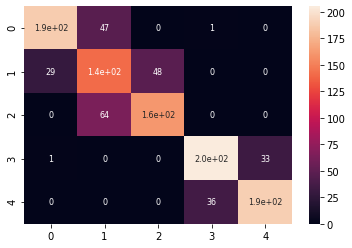

In [18]:
conf_mat = confusion_matrix(Ytest, pred)
sns.heatmap(conf_mat, annot=True,  annot_kws={"size": 8})

# Grid search Sci-Kit KNeighbors

In [20]:
# Grid search Sci-Kit learn

model = KNeighborsClassifier()

n_neighbors = np.arange(1,20)
weights = ['uniform', 'distance']
algorithm = ['ball_tree','kd_tree','brute']
metric = ['euclidean','manhattan','minkowski']

grid_params = [
    {'n_neighbors': n_neighbors,'weights': weights, 'metric': metric ,'algorithm': algorithm},
]



g_search = GridSearchCV(
    estimator=model,
    param_grid=grid_params,
    scoring='precision_micro', # search as that we get minimum of 1 type error
    cv=5, # cross validation
    n_jobs=-1
)


_ = g_search.fit(Xtrain, Ytrain)

model = KNeighborsClassifier(n_neighbors=g_search.best_params_['n_neighbors'], weights=g_search.best_params_['weights'], 
    algorithm=g_search.best_params_['algorithm'], metric=g_search.best_params_['metric'])
model.fit(Xtrain, Ytrain)
pred = model.predict(Xtest)
print('Results:', g_search.best_params_ )
res3 = g_search.best_params_

Results: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}


In [21]:
report3 = classification_report(Ytest, pred)
print('report for Grid search Sci-Kit KNeighbors')
print()
print(report3)

report for Grid search Sci-Kit KNeighbors

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       236
           1       0.59      0.60      0.59       218
           2       0.75      0.76      0.76       225
           3       0.85      0.83      0.84       239
           4       0.83      0.85      0.84       225

    accuracy                           0.78      1143
   macro avg       0.78      0.78      0.78      1143
weighted avg       0.78      0.78      0.78      1143



<AxesSubplot:>

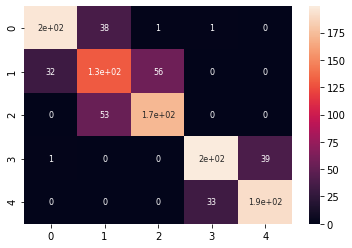

In [22]:
conf_mat = confusion_matrix(Ytest, pred)
sns.heatmap(conf_mat, annot=True,  annot_kws={"size": 8})

# Random search KNeighbors

In [24]:
# Random search
# In random search instead of passing in all hyperparameters' values to try,
# you pass in the distribution of the parameters.



model = KNeighborsClassifier()

distributions = dict(n_neighbors = (1, 20),
        weights = ['uniform', 'distance'],
        algorithm = ['ball_tree','kd_tree','brute'],
        metric = ['euclidean','manhattan','minkowski'])
                     
r_search = RandomizedSearchCV(
    model, 
    distributions, 
    random_state=0, 
    cv=5, # cross validation
    scoring='precision_micro',
    n_jobs=-1
)
_ = r_search.fit(Xtrain, Ytrain)

model = KNeighborsClassifier(weights=r_search.best_params_["weights"], 
    n_neighbors=r_search.best_params_["n_neighbors"], algorithm=r_search.best_params_["algorithm"],metric=r_search.best_params_["metric"] )
model.fit(Xtrain, Ytrain)
pred = model.predict(Xtest)
print('Results:', r_search.best_params_ )
res4 = r_search.best_params_ 

Results: {'weights': 'uniform', 'n_neighbors': 20, 'metric': 'manhattan', 'algorithm': 'brute'}


In [25]:
report4 = classification_report(Ytest, pred)
print('report for Random search KNeighbors')
print()
print(report4)

report for Random search KNeighbors

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       236
           1       0.57      0.59      0.58       218
           2       0.74      0.74      0.74       225
           3       0.85      0.84      0.85       239
           4       0.83      0.85      0.84       225

    accuracy                           0.77      1143
   macro avg       0.77      0.77      0.77      1143
weighted avg       0.77      0.77      0.77      1143



<AxesSubplot:>

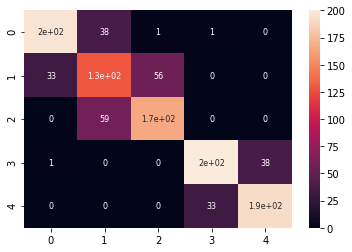

In [26]:
conf_mat = confusion_matrix(Ytest, pred)
sns.heatmap(conf_mat, annot=True,  annot_kws={"size": 8})

# Report parameters:

In [27]:
print('Grid search Sci-Kit DecisionTreeClassifier')
print(res1)
print('Random search DecisionTreeClassifier')
print(res2)
print('Grid search Sci-Kit KNeighbors')
print(res3)
print('Random search KNeighbors')
print(res4)

Grid search Sci-Kit DecisionTreeClassifier
{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5}
Random search DecisionTreeClassifier
{'max_leaf_nodes': 19, 'max_depth': 6, 'criterion': 'entropy'}
Grid search Sci-Kit KNeighbors
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
Random search KNeighbors
{'weights': 'uniform', 'n_neighbors': 20, 'metric': 'manhattan', 'algorithm': 'brute'}


# Conclusion

Grid search

benifits:
scan field of paremeters More fully 

pros: long time of execution
    
Random searh

benifits:  faster than Grid search 

pros: no guarantee that this method can find optimal paremeters

The difference in calculated parameters betwen the search algoritms has occured due to different method of sampling of parameters... 

BTW: parameters calculated so that minimize type 1 error

## Task

<p>Given the data, train KNeighborsClassifier and DecisionTreeClassifier. Find optimal parameters for the classifiers using grid search and random search. Use cross-validation to assess parameters you found. Calculate F1-Score, precision and recall for each class. Make conclusion about which type of search works better for this case.</p>

<p>Even variant - find such parameters for the models, so that they minimize type 1 error.</p>
<p>Odd variant - find such parameters for the models, so that they minimize type 2 error.</p>